# Mini Capstone Project- Fictional Telecommunication company(California)

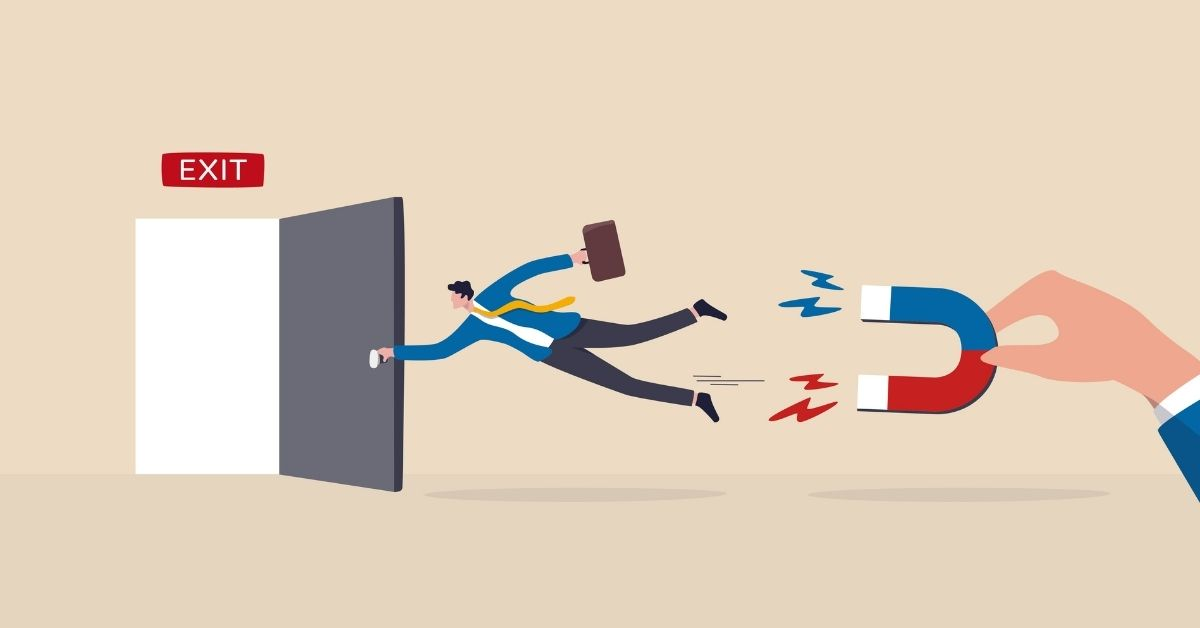

Data set shows the data for Telco Customer Churn. It is basically related to Telecom subsribers and their regular usage.


*   It is having 33 coloumns variety of data with 7043 observations
*   Provided unique customer ID for each subscriber
*   Data is belongs to the country of US and state belongs to California with several states including different Zipcodes
*   Data also describes the Customer type like male/ female an is belongs to Senior citizen or not , having any partner and dependency /not.


*Customer account information*

1. tenure - Number of months the customer has used the service

2. Contract - The contract term of the customer

3. PaperlessBilling - Whether the customer has paperless billing or not

4. PaymentMethod - The customer’s payment method

5. MonthlyCharges - The amount charged to the customer monthly

6. TotalCharges - The total amount charged to the customer


*Services that each customer has signed up for*

1. PhoneService - Whether the customer has a phone service or not
2. MultipleLines - Whether the customer has multiple lines or not
3. InternetService - Customer’s internet service provider
4. OnlineSecurity - Whether the customer has online security or not
5. OnlineBackup - Whether the customer has online backup or not
6. DeviceProtection - Whether the customer has device protection or not
7. TechSupport - Whether the customer has tech support or not
8. StreamingTV - Whether the customer has streaming TV or not
9. StreamingMovies - Whether the customer has streaming movies or not

We can able to do analysis to achive the below goals.

*Company Goals*
Increasing profit! But how can we achieve it? Some of the way to increase profit are:

--> Acquiring new customers as much as we can
--> Retaining existing customers as much as we can

In [63]:
#Importing required libraries for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [64]:
df_teleco= pd.read_excel("/content/Telco_customer_churn.xlsx") #Read the excel file of telecom churn data

##1) Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

### Ans) From then follwing observations it is clear that **Total Charges** data type is read as **object** which should be read as **float**.

### The data types explained statistically

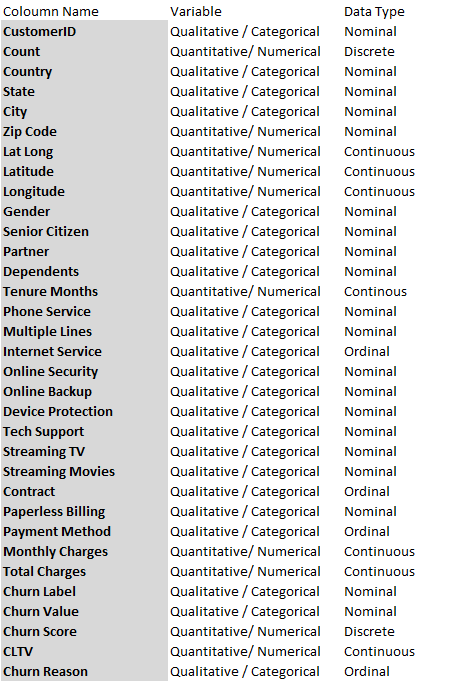

In [65]:
df_teleco.info() #Checking the datatypes of the columns according to Python

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [66]:
df_teleco.shape #To know the number of observations and variables

(7043, 33)

In [67]:
df_teleco.nunique() #checking the unique values

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

### As the **Total Charges** values are read as object we need to convert it to **Float** values by using **to_numeric** function.

In [69]:
df_teleco['Total Charges'] = pd.to_numeric(df_teleco['Total Charges'], errors='coerce') 
#Changing object datatype of 'Total charges' to Numeric 

In [70]:
df_teleco.info() #Rechecking if the total charges values are converted to float which is clear in 33rd column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [71]:
# checking the null values.
df_teleco.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

##  There are **11 null values** in Total charges hence we replace it with the mean or average of the same column

In [72]:
Average_total_charge = df_teleco['Total Charges'].mean()
Average_total_charge
#Averaging the mean values

df_teleco['Total Charges'].fillna(Average_total_charge, inplace =True)
#Replacing missing NaN with Mean

In [73]:
df_teleco.isnull().sum() #Rechecking for null values

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## No null values is numerical data and churn reason is a categorical data

##Statistical datatype conversion

In [76]:
# numerical
column_numerical = ['Count','Zip Code',  'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

# categorical
column_categorical = list(df_teleco)
column_categorical.remove('Count')
column_categorical.remove('Zip Code')
column_categorical.remove('Latitude')
column_categorical.remove('Longitude')
column_categorical.remove('Tenure Months')
column_categorical.remove('Monthly Charges')
column_categorical.remove('Total Charges')
column_categorical.remove('Churn Value')
column_categorical.remove('Churn Score')
column_categorical.remove('CLTV')


data_type_general = dict()    #using dictionary

for col in df_teleco:     # iterating with if else loop
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})   #renaming all data frame
data_type_general

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
general data types,categorical,numerical,categorical,categorical,categorical,numerical,categorical,numerical,numerical,categorical,...,categorical,categorical,categorical,numerical,numerical,categorical,numerical,numerical,numerical,categorical


##2)  Please apply appropriate statistical measures using python based on data types.

In [77]:
df_teleco.describe() #Statistical measures applied to float datatypes in the given data set

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.000258,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1400.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [78]:
df_teleco.describe(include='all') #Statistical measures applied to categorical datatypes in the given data set

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,...,7043,7043,7043,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,...,3,2,4,NaN,NaN,2,NaN,NaN,NaN,20
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,...,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,...,3875,4171,2365,NaN,NaN,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,...,NaN,NaN,NaN,64.761692,2283.300441,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,...,NaN,NaN,NaN,30.090047,2265.000258,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,...,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,...,NaN,NaN,NaN,35.500000,402.225000,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,...,NaN,NaN,NaN,70.350000,1400.550000,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,...,NaN,NaN,NaN,89.850000,3786.600000,NaN,1.000000,75.000000,5380.500000,NaN


## Numerical data
###Ans) The statistical measures are not applied to nominal and ordinal data because they are qualitative in nature.



*   Count column has just 1 as input so mean, median and mode are same with 0 std deviation
*   Zipcode is taken as float value but we dont infer anything from it except the most repeated value in the data, because average, median doesnt matter for zipcode.
*   Latitude have equal mean and median values which makes is normally distributed mean and std deviation can be used as statistical measures
*   Longitude have equal mean and median values which makes is normally distributed mean and std deviation can be used as statistical measures
*   Tenure months has **mean>median** so the distribution is rightly skewed. The min and max values lie outside IQR, hence there are outliers. Median and IQR are used as statistical measures.
*   Monthly charges has **mean<median** so the distribution is left skewed. The min and max values lie outside IQR, presence of outliers. Median and IQR are used as statistical measures.
*    Churn value column has just 1 as input so mean, median and mode are same with 0 std deviation
*   Churn score has mean value slightly greater than median which is minute so the distributed is almost normal or slightly right skewed. Presence of outliers. Median and IQR are used as statistical measures.
*   CLTV has mean lesser than median which makes it left skewed distribution and presence of outliers.Median and IQR are used as statistical measures.
*   Total charges has **mean>median**. The distribution is right skewed. Min and max values lie far away from IQR hence the outliers effects its distribution. Median and IQR are used as statistical measures.

## Categorical Data
The categorical data just gives mode(most repeated values) and unique values in the **describe(include='all')** function.










##3) What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.
###Ans) 
Percentage of females= 49.5%

Percentage of Senior Citizens= 16.2%

In [80]:
100*df_teleco['Gender'].value_counts()/len(df_teleco['Gender'])
#Percentage of males and females in the dataset where we divide total values of each gender by total number of genders and multiply it with 100


Male      50.47565
Female    49.52435
Name: Gender, dtype: float64

### Creating plots for the above data

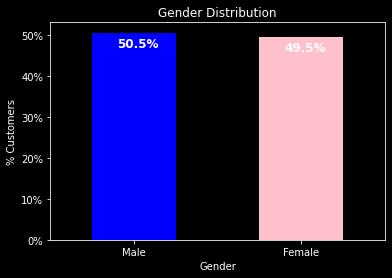

In [90]:
# Creating a bar plot to show the distribution as it is a categorical data
colors = ['Blue','Pink']
ax = (df_teleco['Gender'].value_counts()*100.0 /len(df_teleco)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In [91]:
100*df_teleco['Senior Citizen'].value_counts()/len(df_teleco['Senior Citizen'])
#Percentage of senior citizens in the dataset

No     83.785319
Yes    16.214681
Name: Senior Citizen, dtype: float64

### Creating a piechart to show the distribution of senior citizens within the data set.

Text(0.5, 1.0, '% of Senior Citizens')

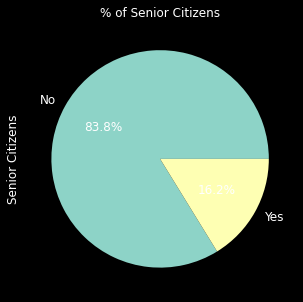

In [92]:
ax = (df_teleco['Senior Citizen'].value_counts()*100.0 /len(df_teleco))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )#Plotting a pie chart                                                                        
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12) #assigning labels
ax.set_title('% of Senior Citizens', fontsize = 12) #assigning title to the chart


##4) Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their tenure')

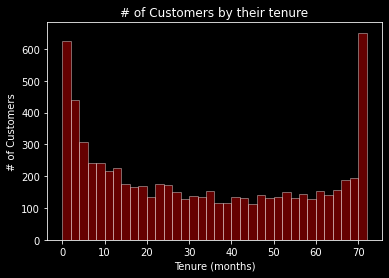

In [93]:
ax = sns.distplot(df_teleco['Tenure Months'], hist=True, kde=False, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 4}) #Plotting distplot to know the distribution of Tenure Months column
ax.set_ylabel('# of Customers') #label x axis
ax.set_xlabel('Tenure (months)') #label y axis
ax.set_title('# of Customers by their tenure') #Assigning the title to the chart

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Tenure Months')

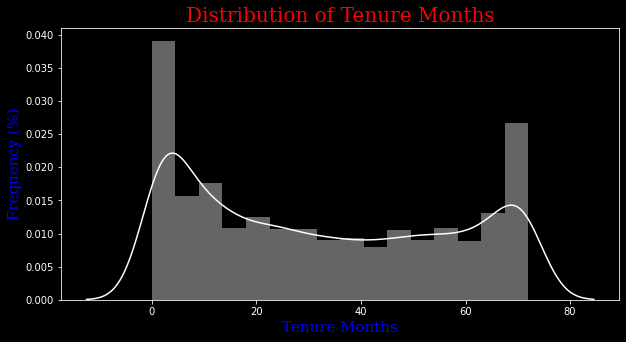

In [96]:
plt.figure(figsize=(10,5))   #defining the figure size

font1 = {'family':'serif','color':'red','size':20}   #Giving font styles for graph
font2 = {'family':'serif','color':'blue','size':15} #Giving font styles for graph

sns.distplot(df_teleco['Tenure Months'],color = 'WHITE')  #Distribution plot to see rating with blue color

plt.xlabel('Tenure Months',fontdict = font2)
plt.ylabel('Frequency (%)',fontdict = font2)
plt.title('Distribution of Tenure Months',fontdict = font1)  # printing title


In [97]:
import scipy.stats as stats #Importing stats library to perform statistical measures

In [99]:
print(stats.skew(df_teleco['Tenure Months'])) #Calculating the skewness value which is greater than '0'

0.2394887299846216


If skewness is less than -1 or greater than 1,

the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1,

the distribution is moderately skewed.
If skewness is between -0.5 and 0.5,

the distribution is approximately symmetric.
For the coloumn : Tenure Months- Skewness = 0.23 is **"Symmetrical"**

In [100]:
df_teleco['Tenure Months'].describe() #Calculating required statistical measures

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

*   We can clearly see that **mean> median** so the distribution is slightly right skewed and also skewness value slightly **greater than 0**
*   Min and max values lie way outside IQR and  there are outliers hence IQR should be calculated as it doesnt get affected by outliers
*   As the data is slightly skewed median and IQR should be calculated as statistical measures
*   As the skewness value is very nearer to '0' we can consider it to be symmetrical





##5)Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

In [101]:
df1= df_teleco.replace( to_replace ='Yes', value=1) #Replacing 'YES' and 'NO' with '1' and '0' respectively
df2= df1.replace(to_replace='No', value=0) 
df2

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,1,Electronic check,99.65,820.50,1,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,1,Bank transfer (automatic),21.15,1419.40,0,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,1,Mailed check,84.80,1990.50,0,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,1,Electronic check,29.60,346.45,0,0.0,59.0,2793.0,NaN


In [102]:
df3= df2.replace( to_replace ='Male', value=1)  #Replacing 'Male' and 'Female' with '1' and '0' respectively
df4= df3.replace(to_replace='Female', value=0)
df4

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,0,...,Month-to-month,1,Electronic check,99.65,820.50,1,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,0,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,1,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,0,...,Two year,1,Bank transfer (automatic),21.15,1419.40,0,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,1,...,One year,1,Mailed check,84.80,1990.50,0,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,0,...,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,0,...,Month-to-month,1,Electronic check,29.60,346.45,0,0.0,59.0,2793.0,NaN


##6) Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also

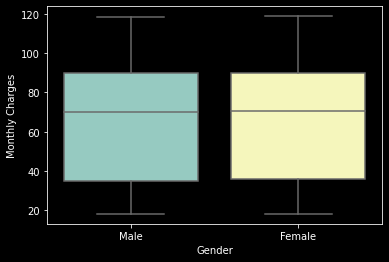

In [103]:
sns.boxplot(x=df_teleco['Gender'], y=df_teleco['Monthly Charges']) #Plotting the box plot to study the distribution

In [104]:
df_teleco['Gender'].describe()

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object

In [106]:
df_teleco['Monthly Charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

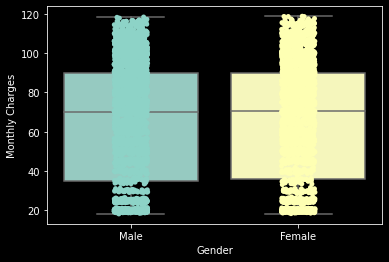

In [107]:
sns.boxplot(x=df_teleco['Gender'], y=df_teleco['Monthly Charges'])
sns.stripplot(x="Gender", y="Monthly Charges",data=df_teleco) #Using strip plot for better understanding of data

##Distribution: When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left). Both Male and Female are behaving in the similary way for monthly charges.

##7) Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [109]:
df_teleco.loc[0: ,'Total Charges'].min() # Using the loc function to know the min total charges of the Los Angeles city

18.8

In [112]:
idx = df_teleco.groupby(['City'])['Total Charges'].transform(max) == df_teleco['Total Charges']
df_teleco[idx]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
30,6207-WIOLX,1.0,United States,California,Avalon,90704.0,"33.391181, -118.421305",33.391181,-118.421305,Female,...,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes,1.0,99.0,4190.0,Lack of self-service on Website
50,7825-ECJRF,1.0,United States,California,Santa Clarita,91350.0,"34.502432, -118.41459",34.502432,-118.414590,Female,...,Month-to-month,Yes,Electronic check,106.60,1934.45,Yes,1.0,71.0,3764.0,Network reliability
70,4484-GLZOU,1.0,United States,California,San Dimas,91773.0,"34.102119, -117.815532",34.102119,-117.815532,Female,...,Month-to-month,Yes,Electronic check,105.05,5624.85,Yes,1.0,65.0,4839.0,Don't know
102,0979-PHULV,1.0,United States,California,Holtville,92250.0,"32.811001, -115.152865",32.811001,-115.152865,Male,...,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,Yes,1.0,80.0,4020.0,Extra data charges
110,7752-XUSCI,1.0,United States,California,Crestline,92325.0,"34.248061, -117.29028",34.248061,-117.290280,Female,...,Month-to-month,Yes,Electronic check,105.90,6396.45,Yes,1.0,84.0,4105.0,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,7203-OYKCT,1.0,United States,California,Palo Verde,92266.0,"33.3249, -114.758334",33.324900,-114.758334,Male,...,One year,Yes,Electronic check,104.95,7544.30,No,0.0,20.0,5760.0,NaN
7031,9281-CEDRU,1.0,United States,California,Salton City,92275.0,"33.28156, -115.955541",33.281560,-115.955541,Female,...,Two year,No,Bank transfer (automatic),64.10,4326.25,No,0.0,48.0,5553.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN


In [115]:
maxValueIndex = df_teleco['Total Charges'].idxmax() #To find the index number of maximum total charges from the data
maxValueIndex

1206

In [116]:
df_teleco.loc[1206,'Total Charges'] #Finding the maximum value associated with the index of maximum total charges

8684.8

In [117]:
df_teleco.loc[1206,"Zip Code"] #Finding the zipcode assocaited with the index of maximum total charges

95519.0

##8)Please find which payment method has the highest churn score and which has the lowest churn score

In [118]:
Max_Value_Index = df_teleco['Churn Score'].idxmax()
print('Max_Value_Index:', Max_Value_Index)
#Finding and printing the max index

Min_Value_Index = df_teleco['Churn Score'].idxmin()
print('Min_Value_Index:', Min_Value_Index)
#Finding and printing the min index

Max_Value_Index: 6
Min_Value_Index: 2148


In [120]:
Highest_Churn_Score_Payment_Method = df_teleco.loc[6,'Payment Method']
print('Highest_Churn_Score_Payment_Method:-', Highest_Churn_Score_Payment_Method )
#Printing with respect to max index

Lowest_Churn_Score_Payment_Method= df_teleco.loc[2148,'Payment Method']
print('Lowest_Churn_Score_Payment_Method:-', Lowest_Churn_Score_Payment_Method)
#Printing with respect to min index

Highest_Churn_Score_Payment_Method:- Electronic check
Lowest_Churn_Score_Payment_Method:- Credit card (automatic)


In [121]:
df_teleco.loc[6,'Payment Method'] #Finding the payment method associated with highest churn score

'Electronic check'

In [122]:
minValueIndex= df_teleco['Churn Score'].idxmin() #Finding the lowest churn score index number
minValueIndex

2148

In [124]:
df_teleco.loc[2148,'Payment Method'] #Finding the payment method associated with lowest churn score

'Credit card (automatic)'

##9) Please create an appropriate plot to check the count of payment methods and explain it.



Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

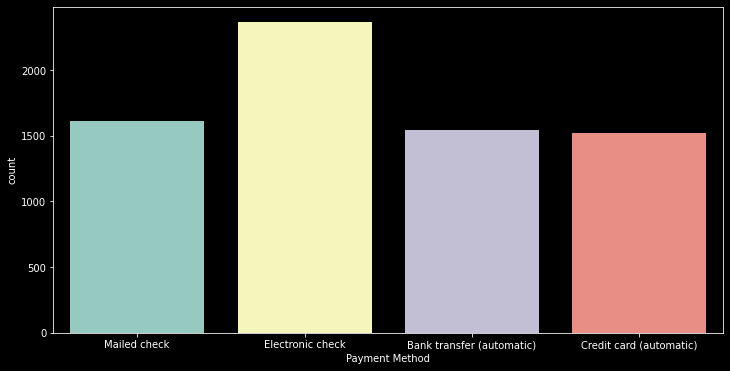

In [125]:
plt.figure(figsize=(12,6)) #Assigning the figure size
sns.countplot(x='Payment Method', data= df_teleco)#Counting number of males and females in the data using count plot
df_teleco['Payment Method'].value_counts() #finding the values of each count

1)**Electronic check 2365**

2)Mailed check 1612

3)Bank transfer (automatic) 1544

4)Credit card (automatic) 1522




** We can say from Electronic Check most payments happended. Suggestion: Company need to spread the benefits of using electronic check and convert the credit and bank payments to electronic check.**

##10)Please create an appropriate plot to see the relationship between monthly charges and total charges.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


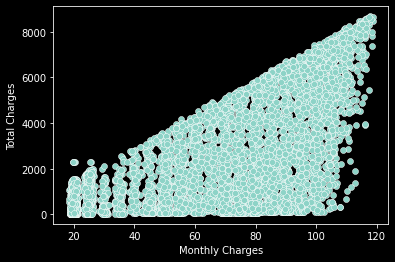

In [126]:
sns.scatterplot(df_teleco['Monthly Charges'],df_teleco['Total Charges']) 
#Scatterplot is used to give the relation between two numerical variables

###We observe that the total charges increases as the monthly charges for a customer increases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation Between Monthly charges and Total charges')

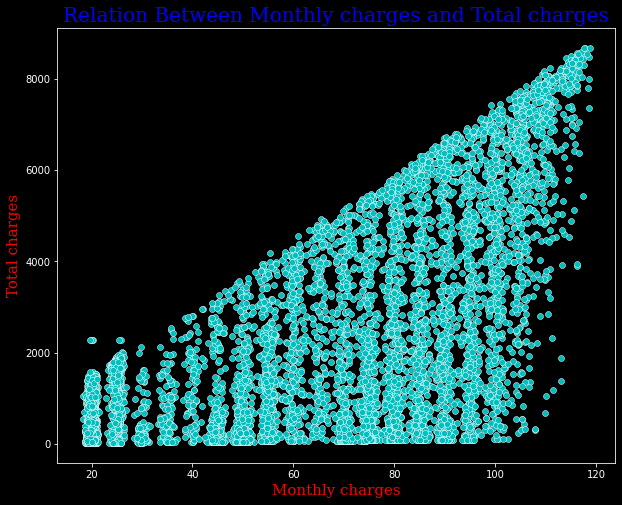

In [127]:
plt.figure(figsize = (10,8)) #defining the figure size

sns.scatterplot(df_teleco['Monthly Charges'],df_teleco['Total Charges'],color = 'c') #Scatter plot

font1 = {'family':'serif','color':'blue','size':20}   #Giving font styles for graph
font2 = {'family':'serif','color':'red','size':15} #Giving font styles for graph

plt.xlabel('Monthly charges', fontdict = font2)  #xlabel
plt.ylabel('Total charges',fontdict = font2)     #ylabel
plt.title('Relation Between Monthly charges and Total charges',fontdict = font1)